<a href="https://colab.research.google.com/github/longkun158/Personal-page/blob/main/DotData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. EDA - Data Cleaning and Processing

In [37]:
import pandas as pd
import numpy as np
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set()

## Raw data

In [38]:
#Loading Datas and Naming Tables

jan = pd.read_csv("2015-01_100k.csv")
feb = pd.read_csv("2015-02_100k.csv")
mar = pd.read_csv("2015-03_100k.csv")
apr = pd.read_csv("2015-04_100k.csv")
may = pd.read_csv("2015-05_100k.csv")
jun = pd.read_csv("2015-06_100k.csv")
jul = pd.read_csv("2015-07_100k.csv")
aug = pd.read_csv("2015-08_100k.csv")
sep = pd.read_csv("2015-09_100k.csv")
oct = pd.read_csv("2015-10_100k.csv")
nov = pd.read_csv("2015-11_100k.csv")
dec = pd.read_csv("2015-12_100k.csv")

holiday = pd.read_csv('holidays.csv', delimiter=';')
weather = pd.read_csv("2015_weather.csv", delimiter=';')

dataframes = [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]

# Concatenating all dataframes into one
df_raw = pd.concat(dataframes, ignore_index=True)
df_raw.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_zip,pickup_borough,pickup_neighborhood,dropoff_zip,dropoff_borough,dropoff_neighborhood
0,2,2015-01-06 11:39:29,2015-01-06 11:49:15,1,1.780000,-73.999619,40.743599,1,N,-73.992203,40.764019,2,9.000000,0.000000,0.500000,0.000000,0.000000,0.300000,9.800000,10011,Manhattan,Chelsea and Clinton,10036,Manhattan,Chelsea and Clinton
1,1,2015-01-13 09:18:29,2015-01-13 09:23:40,1,2.100000,-73.981956,40.778290,1,N,-73.962173,40.805355,1,7.500000,0.000000,0.500000,2.450000,0.000000,0.300000,10.750000,10023,Manhattan,Upper West Side,10024,Manhattan,Upper West Side
2,2,2015-01-16 07:15:44,2015-01-16 07:26:42,1,2.330000,-73.991188,40.742226,1,N,-73.981613,40.768452,1,10.000000,0.000000,0.500000,1.000000,0.000000,0.300000,11.800000,10010,Manhattan,Gramercy Park and Murray Hill,10019,Manhattan,Chelsea and Clinton
3,1,2015-01-23 11:56:05,2015-01-23 12:13:20,1,2.100000,-73.959297,40.763336,1,N,-73.979996,40.781071,2,12.500000,0.000000,0.500000,0.000000,0.000000,0.300000,13.300000,10065,Manhattan,Upper East Side,10023,Manhattan,Upper West Side
4,1,2015-01-24 10:11:48,2015-01-24 10:18:32,2,0.900000,-73.971832,40.764751,1,N,-73.984047,40.764519,2,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,7.300000,10065,Manhattan,Upper East Side,10019,Manhattan,Chelsea and Clinton


In [39]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1200000 non-null  int64  
 1   pickup_datetime        1200000 non-null  object 
 2   dropoff_datetime       1200000 non-null  object 
 3   passenger_count        1200000 non-null  int64  
 4   trip_distance          1200000 non-null  float64
 5   pickup_longitude       1200000 non-null  float64
 6   pickup_latitude        1200000 non-null  float64
 7   RateCodeID             1200000 non-null  int64  
 8   store_and_fwd_flag     1200000 non-null  object 
 9   dropoff_longitude      1200000 non-null  float64
 10  dropoff_latitude       1200000 non-null  float64
 11  payment_type           1200000 non-null  int64  
 12  fare_amount            1200000 non-null  float64
 13  extra                  1200000 non-null  float64
 14  mta_tax           

In [40]:
pd.options.display.float_format = '{:.6f}'.format
df_raw.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_zip,dropoff_zip
count,1200000.000000,1200000.000000,1200000.000000,1200000.000000,1200000.000000,1200000.000000,1200000.000000,1200000.000000,1200000.000000,1200000.000000,1200000.000000,1200000.000000,1200000.000000,1200000.000000,1200000.000000,1200000.000000,1200000.000000,1200000.000000
mean,1.528088,1.684683,12.359002,-73.978092,40.753129,1.003112,-73.975728,40.753034,1.374073,11.584283,0.320804,0.499820,1.543592,0.188510,0.298615,14.437078,10091.717316,10132.612937
std,0.499211,1.338642,10771.875607,0.025266,0.023093,0.292960,0.027199,0.029026,0.493683,7.652375,0.362914,0.009474,2.040331,1.033830,0.020335,9.454744,283.218187,343.452158
min,1.000000,0.000000,0.000000,-74.114113,40.576962,1.000000,-74.238556,40.514538,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,10001.000000,10001.000000
25%,1.000000,1.000000,1.000000,-73.992325,40.738617,1.000000,-73.991570,40.737320,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000,10012.000000,10013.000000
50%,2.000000,1.000000,1.700000,-73.982246,40.754608,1.000000,-73.980537,40.754848,1.000000,9.500000,0.000000,0.500000,1.160000,0.000000,0.300000,11.760000,10019.000000,10020.000000
75%,2.000000,2.000000,2.960000,-73.969177,40.768425,1.000000,-73.965111,40.769558,2.000000,14.000000,0.500000,0.500000,2.250000,0.000000,0.300000,16.800000,10028.000000,10035.000000
max,2.000000,7.000000,11800000.300000,-73.706551,40.906921,99.000000,-73.698898,40.911797,4.000000,800.000000,8.500000,0.500000,400.000000,135.130000,0.300000,800.300000,11692.000000,11697.000000


In [41]:
df_raw.columns

Index(['VendorID', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RateCodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_zip',
       'pickup_borough', 'pickup_neighborhood', 'dropoff_zip',
       'dropoff_borough', 'dropoff_neighborhood'],
      dtype='object')

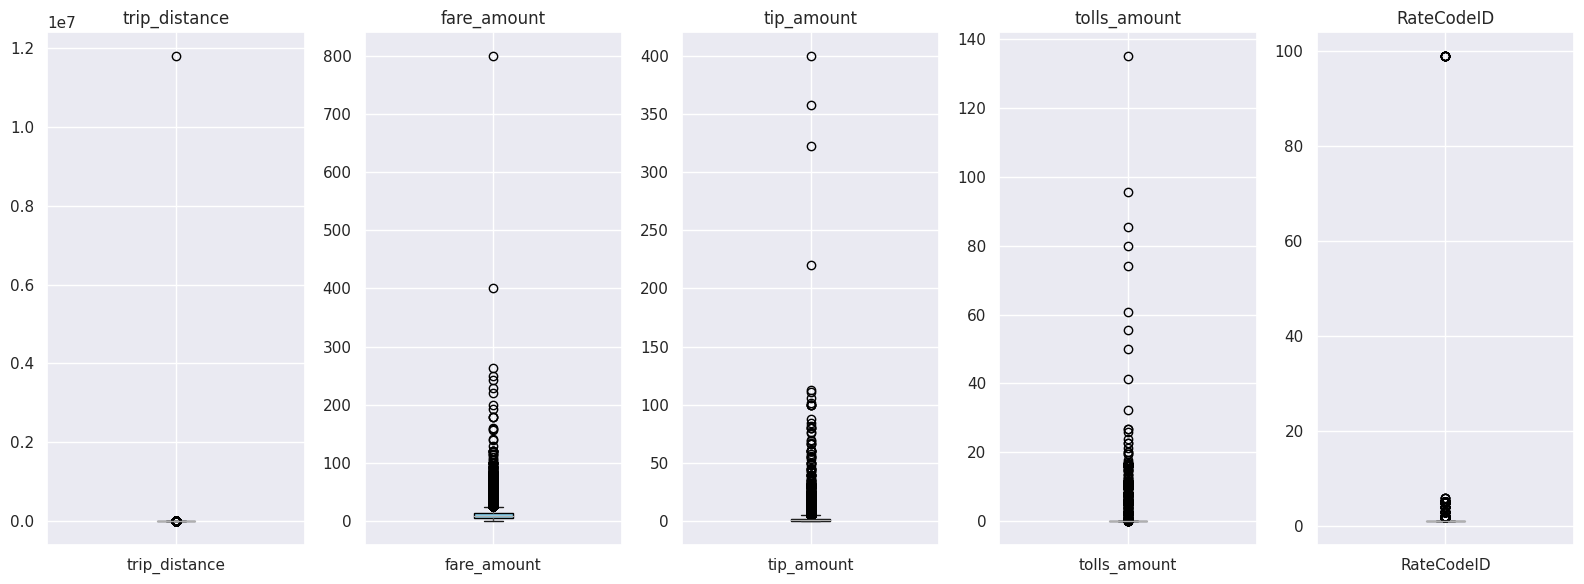

In [42]:
# Define the columns to process
columns_box_raw = df_raw[['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'RateCodeID']]

# Create a figure with subplots
fig, axes = plt.subplots(1, len(columns_box_raw.columns), figsize=(16, 6))

# Plot each column in a separate subplot
for i, col in enumerate(columns_box_raw.columns):
    df_raw.boxplot(column=col, ax=axes[i], patch_artist=True, boxprops=dict(facecolor='skyblue'))
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [43]:
#Double checking outliers value before removing them.

max_trip = df_raw[df_raw['trip_distance'] == df_raw['trip_distance'].max()]
max_fare = df_raw[df_raw['fare_amount'] == df_raw['fare_amount'].max()]
max_tip = df_raw[df_raw['tip_amount'] == df_raw['tip_amount'].max()]
max_tolls = df_raw[df_raw['tolls_amount'] == df_raw['tolls_amount'].max()]
outliers = pd.concat([max_trip, max_fare, max_tip, max_tolls])
outliers

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_zip,pickup_borough,pickup_neighborhood,dropoff_zip,dropoff_borough,dropoff_neighborhood
179272,1,2015-02-06 16:07:44,2015-02-06 16:35:23,1,11800000.300000,-73.994041,40.751209,1,N,-73.954895,40.778282,1,19.500000,1.000000,0.500000,4.260000,0.000000,0.300000,25.560000,10001,Manhattan,Chelsea and Clinton,10028,Manhattan,Upper East Side
477324,2,2015-05-28 18:20:27,2015-05-28 18:28:45,1,0.000000,-74.028702,40.618698,5,N,-74.028702,40.618698,2,800.000000,0.000000,0.000000,0.000000,0.000000,0.300000,800.300000,11209,Brooklyn,Southwest Brooklyn,11209,Brooklyn,Southwest Brooklyn
423775,1,2015-05-26 03:46:08,2015-05-26 04:36:31,1,7.500000,-73.921051,40.760731,1,N,-73.973930,40.764313,1,37.000000,0.500000,0.500000,400.000000,0.000000,0.300000,438.300000,11103,Queens,Northwest Queens,10022,Manhattan,Gramercy Park and Murray Hill
752269,1,2015-08-01 16:13:10,2015-08-01 16:41:59,1,9.500000,-73.885330,40.773098,1,N,-74.001381,40.736614,3,31.000000,0.000000,0.500000,0.000000,135.130000,0.300000,166.930000,11370,Queens,West Queens,10014,Manhattan,Greenwich Village and Soho


## Clean Data

### Removing outliers
Since these outliers are either typos, or mistake made by data inputing since other columns does not verify the abnormal in these values. <br>
Hence, I decide to remove them to better off models.

In [44]:
columns_box = ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'RateCodeID']

# Remove rows with the specified conditions
df = df_raw[
    (df_raw['trip_distance'] <= 20) &
    (df_raw['fare_amount'] <= 200) &
    (df_raw['tip_amount'] <= 200) &
    (df_raw['tolls_amount'] <= 40) &
    (df_raw['RateCodeID'] <= 15)
]

In [45]:
df.columns

Index(['VendorID', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RateCodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_zip',
       'pickup_borough', 'pickup_neighborhood', 'dropoff_zip',
       'dropoff_borough', 'dropoff_neighborhood'],
      dtype='object')

In [46]:
numeric_columns = ['trip_distance', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
                   'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                   'tolls_amount', 'improvement_surcharge', 'total_amount']
cate_columns = ['VendorID', 'RateCodeID', 'store_and_fwd_flag', 'payment_type', 'pickup_borough', 'pickup_neighborhood',
                'dropoff_borough', 'dropoff_neighborhood']

In [47]:
df.shape

(1199595, 25)

In [48]:
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_zip,pickup_borough,pickup_neighborhood,dropoff_zip,dropoff_borough,dropoff_neighborhood
0,2,2015-01-06 11:39:29,2015-01-06 11:49:15,1,1.780000,-73.999619,40.743599,1,N,-73.992203,40.764019,2,9.000000,0.000000,0.500000,0.000000,0.000000,0.300000,9.800000,10011,Manhattan,Chelsea and Clinton,10036,Manhattan,Chelsea and Clinton
1,1,2015-01-13 09:18:29,2015-01-13 09:23:40,1,2.100000,-73.981956,40.778290,1,N,-73.962173,40.805355,1,7.500000,0.000000,0.500000,2.450000,0.000000,0.300000,10.750000,10023,Manhattan,Upper West Side,10024,Manhattan,Upper West Side
2,2,2015-01-16 07:15:44,2015-01-16 07:26:42,1,2.330000,-73.991188,40.742226,1,N,-73.981613,40.768452,1,10.000000,0.000000,0.500000,1.000000,0.000000,0.300000,11.800000,10010,Manhattan,Gramercy Park and Murray Hill,10019,Manhattan,Chelsea and Clinton
3,1,2015-01-23 11:56:05,2015-01-23 12:13:20,1,2.100000,-73.959297,40.763336,1,N,-73.979996,40.781071,2,12.500000,0.000000,0.500000,0.000000,0.000000,0.300000,13.300000,10065,Manhattan,Upper East Side,10023,Manhattan,Upper West Side
4,1,2015-01-24 10:11:48,2015-01-24 10:18:32,2,0.900000,-73.971832,40.764751,1,N,-73.984047,40.764519,2,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,7.300000,10065,Manhattan,Upper East Side,10019,Manhattan,Chelsea and Clinton


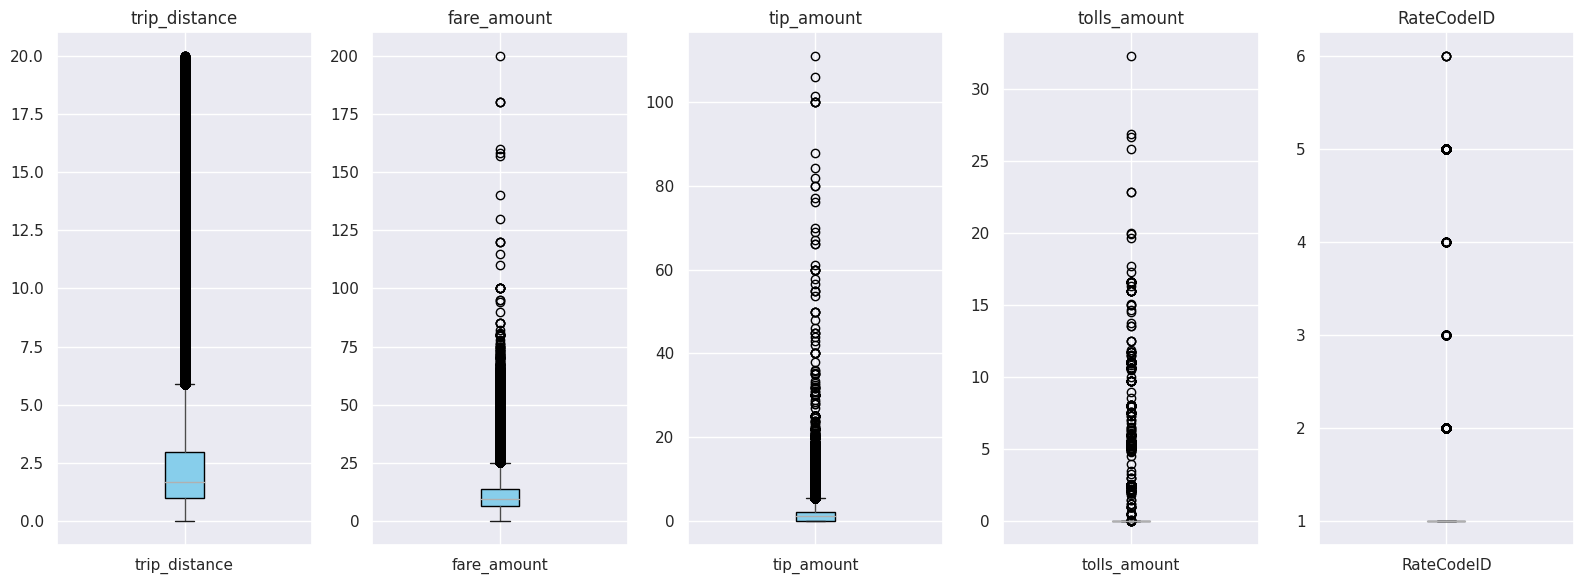

In [49]:
fig, axes = plt.subplots(1, len(columns_box), figsize=(16, 6))

for i, col in enumerate(columns_box):
    df.boxplot(column=col, ax=axes[i], patch_artist=True, boxprops=dict(facecolor='skyblue'))
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

## Conclusion about data set
- Does not have missing values.
- Removing outliers to later improve model performance. Using Visual test by Boxplots.
- Rather than 'trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'RateCodeID', other columns does not have high value outliers that might affect model.

## Adding Seasons columns, Seperate Date and Time

In [50]:
# Assuming df is your DataFrame and the date columns are initially strings
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Add new columns for pickup and dropoff date and time
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_time'] = df['pickup_datetime'].dt.time
df['dropoff_date'] = df['dropoff_datetime'].dt.date
df['dropoff_time'] = df['dropoff_datetime'].dt.time

# Create a mapping dictionary for seasons
season_mapping = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

# Extract month from dropoff_date and map it to seasons
df['season'] = df['dropoff_datetime'].dt.month.map(season_mapping)

df.head()

<ipython-input-50-121b1767b1a7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-121b1767b1a7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-121b1767b1a7>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-121b176

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_zip,pickup_borough,pickup_neighborhood,dropoff_zip,dropoff_borough,dropoff_neighborhood,pickup_date,pickup_time,dropoff_date,dropoff_time,season
0,2,2015-01-06 11:39:29,2015-01-06 11:49:15,1,1.780000,-73.999619,40.743599,1,N,-73.992203,40.764019,2,9.000000,0.000000,0.500000,0.000000,0.000000,0.300000,9.800000,10011,Manhattan,Chelsea and Clinton,10036,Manhattan,Chelsea and Clinton,2015-01-06,11:39:29,2015-01-06,11:49:15,Winter
1,1,2015-01-13 09:18:29,2015-01-13 09:23:40,1,2.100000,-73.981956,40.778290,1,N,-73.962173,40.805355,1,7.500000,0.000000,0.500000,2.450000,0.000000,0.300000,10.750000,10023,Manhattan,Upper West Side,10024,Manhattan,Upper West Side,2015-01-13,09:18:29,2015-01-13,09:23:40,Winter
2,2,2015-01-16 07:15:44,2015-01-16 07:26:42,1,2.330000,-73.991188,40.742226,1,N,-73.981613,40.768452,1,10.000000,0.000000,0.500000,1.000000,0.000000,0.300000,11.800000,10010,Manhattan,Gramercy Park and Murray Hill,10019,Manhattan,Chelsea and Clinton,2015-01-16,07:15:44,2015-01-16,07:26:42,Winter
3,1,2015-01-23 11:56:05,2015-01-23 12:13:20,1,2.100000,-73.959297,40.763336,1,N,-73.979996,40.781071,2,12.500000,0.000000,0.500000,0.000000,0.000000,0.300000,13.300000,10065,Manhattan,Upper East Side,10023,Manhattan,Upper West Side,2015-01-23,11:56:05,2015-01-23,12:13:20,Winter
4,1,2015-01-24 10:11:48,2015-01-24 10:18:32,2,0.900000,-73.971832,40.764751,1,N,-73.984047,40.764519,2,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,7.300000,10065,Manhattan,Upper East Side,10019,Manhattan,Chelsea and Clinton,2015-01-24,10:11:48,2015-01-24,10:18:32,Winter


# 2. Finding patterns, trends, and relationships

## Testing between numerical columns

In [51]:
# sns.pairplot(df[numeric_columns])
# plt.show()

In [52]:
# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Find pairs with correlation greater than 0.5
high_correlation_pairs = correlation_matrix.stack().reset_index()
high_correlation_pairs.columns = ['Variable1', 'Variable2', 'Correlation']
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs['Variable1'] != high_correlation_pairs['Variable2']]
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs['Correlation'].abs() > 0.5]

# Remove duplicate pairs
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs[['Variable1', 'Variable2']].apply(lambda x: sorted(x), axis=1).duplicated() == False]

# Display the results
high_correlation_pairs

,Variable1,Variable2,Correlation
6,trip_distance,fare_amount,0.938663
9,trip_distance,tip_amount,0.524841
10,trip_distance,tolls_amount,0.565389
12,trip_distance,total_amount,0.930647
87,fare_amount,tip_amount,0.537015
88,fare_amount,tolls_amount,0.515936
90,fare_amount,total_amount,0.976594
129,tip_amount,total_amount,0.685865
142,tolls_amount,total_amount,0.605565


In [53]:
# Calculate the correlation of tip_amount with other variables
tip_correlation = correlation_matrix['tip_amount'].drop('tip_amount').reset_index()
tip_correlation.columns = ['Variable', 'Correlation_with_tip_amount']

# Display the results
tip_correlation

,Variable,Correlation_with_tip_amount
0,trip_distance,0.524841
1,passenger_count,-0.006546
2,pickup_longitude,0.175240
3,pickup_latitude,-0.028354
4,dropoff_longitude,0.152702
5,dropoff_latitude,-0.069400
6,fare_amount,0.537015
7,extra,0.032644
8,mta_tax,-0.006990
9,tolls_amount,0.389152


### Quick conclusion about numerical variables
- Total_amount and fare_amount has the strongest linear relationship among other variables
- For Tip_amount itself, it has strongest relationship with fare_amount, trip_distance, total_amount
- However, linear relationship between them are overall medium to weak.

## Testing relationship between some targeted variables (including categorical data)

### A. Categorical Variables Analysis

**Payment type and Borough**

In [54]:
sample_df = df.sample(n=10000, random_state=42)

# Step 2: Create a contingency table
contingency_table = pd.crosstab(sample_df['payment_type'], sample_df['pickup_borough'])

# Step 3: Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 12.649175021674948
P-Value: 0.1791337493252293
Degrees of Freedom: 9
Expected Frequencies:
[[4.3932000e+00 1.0794720e+02 5.9270544e+03 2.3660520e+02]
 [2.5851000e+00 6.3519600e+01 3.4876692e+03 1.3922610e+02]
 [1.5400000e-02 3.7840000e-01 2.0776800e+01 8.2940000e-01]
 [6.3000000e-03 1.5480000e-01 8.4996000e+00 3.3930000e-01]]


In [55]:
sample_df = df.sample(n=10000, random_state=42)

# Step 2: Create a contingency table
contingency_table = pd.crosstab(sample_df['payment_type'], sample_df['dropoff_borough'])

# Step 3: Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 49.871686044994966
P-Value: 1.1387646891441312e-07
Degrees of Freedom: 9
Expected Frequencies:
[[4.2676800e+01 2.6735760e+02 5.7199464e+03 2.4601920e+02]
 [2.5112400e+01 1.5732180e+02 3.3658002e+03 1.4476560e+02]
 [1.4960000e-01 9.3720000e-01 2.0050800e+01 8.6240000e-01]
 [6.1200000e-02 3.8340000e-01 8.2026000e+00 3.5280000e-01]]


**Payment Type vs Passenger Count**

In [56]:
sample_df = df.sample(n=10000, random_state=42)

# Step 2: Create a contingency table
contingency_table = pd.crosstab(sample_df['payment_type'], sample_df['passenger_count'])

# Step 3: Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 65.7388036101499
P-Value: 2.3434806554044585e-07
Degrees of Freedom: 18
Expected Frequencies:
[[1.2552000e+00 4.4139108e+03 8.6797080e+02 2.7488880e+02 1.3556160e+02
  3.5835960e+02 2.2405320e+02]
 [7.3860000e-01 2.5972869e+03 5.1074190e+02 1.6175340e+02 7.9768800e+01
  2.1087030e+02 1.3184010e+02]
 [4.4000000e-03 1.5472600e+01 3.0426000e+00 9.6360000e-01 4.7520000e-01
  1.2562000e+00 7.8540000e-01]
 [1.8000000e-03 6.3297000e+00 1.2447000e+00 3.9420000e-01 1.9440000e-01
  5.1390000e-01 3.2130000e-01]]


In [57]:
# Create contingency count tables for each column
contingency_tables = {}
for column in cate_columns:
    contingency_tables[column] = pd.crosstab(index=df[column], columns=column)

# Display the contingency count tables
for column, table in contingency_tables.items():
    print(f"Contingency count table for column: {column}")
    display(table)
    print("\n")

Contingency count table for column: VendorID


col_0,VendorID
VendorID,
1,566090
2,633505




Contingency count table for column: RateCodeID


col_0,RateCodeID
RateCodeID,
1,1197995
2,1208
3,50
4,28
5,310
6,4




Contingency count table for column: store_and_fwd_flag


col_0,store_and_fwd_flag
store_and_fwd_flag,
N,1190276
Y,9319




Contingency count table for column: payment_type


col_0,payment_type
payment_type,
1,755657
2,440164
3,2795
4,979




Contingency count table for column: pickup_borough


col_0,pickup_borough
pickup_borough,
Bronx,799
Brooklyn,20321
Manhattan,1136067
Queens,42406
Staten Island,2




Contingency count table for column: pickup_neighborhood


col_0,pickup_neighborhood
pickup_neighborhood,
Borough Park,179
Bronx Park and Fordham,64
Bushwick and Williamsburg,1353
Canarsie and Flatlands,21
Central Bronx,64
Central Brooklyn,1445
Central Harlem,8617
Central Queens,40
Chelsea and Clinton,327528




Contingency count table for column: dropoff_borough


col_0,dropoff_borough
dropoff_borough,
Bronx,6578
Brooklyn,55635
Manhattan,1090714
Queens,46580
Staten Island,88




Contingency count table for column: dropoff_neighborhood


col_0,dropoff_neighborhood
dropoff_neighborhood,
Borough Park,1421
Bronx Park and Fordham,793
Bushwick and Williamsburg,5981
Canarsie and Flatlands,248
Central Bronx,742
Central Brooklyn,7391
Central Harlem,17867
Central Queens,500
Chelsea and Clinton,294035


In [58]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create interactive bar graphs for each contingency count table
for column in cate_columns:
    # Get the contingency count table for the current column
    contingency_table = pd.crosstab(index=df[column], columns=column)

    # Create a bar graph
    fig = go.Figure(go.Bar(
        x=contingency_table.index,
        y=contingency_table.iloc[:, 0],
        text=contingency_table.iloc[:, 0],
        textposition='auto',
        marker_color='lightpink'
    ))

    # Update layout
    fig.update_layout(title=f'Contingency count for {column}', xaxis_title=column, yaxis_title='Count')

    # Show the plot
    fig.show()

### B. Testing Tips Amount vs Categorical Variables

#### Tip amount vs Dropoff borough, Pickup Borough

In [59]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('tip_amount ~ C(dropoff_borough)', data=sample_df).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

                         sum_sq          df          F   PR(>F)
C(dropoff_borough)  2100.977017    3.000000 211.242212 0.000000
Residual           33139.472277 9996.000000        NaN      NaN


In [60]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=sample_df['tip_amount'], groups=sample_df['dropoff_borough'], alpha=0.05)

# Display the results
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Bronx  Brooklyn   1.0864    0.0  0.4755  1.6974   True
    Bronx Manhattan  -0.2678 0.6214 -0.8373  0.3016  False
    Bronx    Queens   1.6885    0.0  1.0739  2.3031   True
 Brooklyn Manhattan  -1.3543    0.0 -1.5862 -1.1224   True
 Brooklyn    Queens   0.6021    0.0  0.2746  0.9295   True
Manhattan    Queens   1.9564    0.0   1.715  2.1977   True
----------------------------------------------------------


In [61]:
mean_tip_amount_by_borough = df.groupby('dropoff_borough')['tip_amount'].mean()
ranked_boroughs = mean_tip_amount_by_borough.sort_values(ascending=False)
print(ranked_boroughs)

dropoff_borough
Staten Island   7.211705
Queens          3.290475
Brooklyn        2.742860
Bronx           2.074886
Manhattan       1.401066
Name: tip_amount, dtype: float64


In [62]:
# Pick up Borough

model = ols('tip_amount ~ C(pickup_borough)', data=sample_df).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

                        sum_sq          df          F   PR(>F)
C(pickup_borough)  2530.927643    3.000000 257.816394 0.000000
Residual          32709.521652 9996.000000        NaN      NaN


In [63]:
# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=sample_df['tip_amount'], groups=sample_df['dropoff_borough'], alpha=0.05)

# Display the results
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Bronx  Brooklyn   1.0864    0.0  0.4755  1.6974   True
    Bronx Manhattan  -0.2678 0.6214 -0.8373  0.3016  False
    Bronx    Queens   1.6885    0.0  1.0739  2.3031   True
 Brooklyn Manhattan  -1.3543    0.0 -1.5862 -1.1224   True
 Brooklyn    Queens   0.6021    0.0  0.2746  0.9295   True
Manhattan    Queens   1.9564    0.0   1.715  2.1977   True
----------------------------------------------------------


In [64]:
mean_tip_amount_by_borough = sample_df.groupby('pickup_borough')['tip_amount'].mean()
ranked_boroughs = mean_tip_amount_by_borough.sort_values(ascending=False)
print(ranked_boroughs)

pickup_borough
Queens      4.060584
Brooklyn    1.611105
Manhattan   1.419892
Bronx       1.050000
Name: tip_amount, dtype: float64


#### Tip amount vs neighboorhood

Pick Up Neighboorhood

In [65]:
import statsmodels.stats.multicomp as mc

# Step 1: One-way ANOVA
model = ols('tip_amount ~ C(pickup_neighborhood)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA results:")
print(anova_table)

ANOVA results:
                               sum_sq             df           F   PR(>F)
C(pickup_neighborhood)  388065.891910      39.000000 2898.054142 0.000000
Residual               4118646.673316 1199555.000000         NaN      NaN


In [66]:
# Step 2: Tukey HSD Test
tukey = mc.pairwise_tukeyhsd(df['tip_amount'], df['pickup_neighborhood'], alpha=0.05)
print("\nTukey HSD results:")
print(tukey)


Tukey HSD results:
                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                        
            group1                        group2            meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------------------------
                 Borough Park        Bronx Park and Fordham  -0.7266 0.7724  -1.7758  0.3225  False
                 Borough Park     Bushwick and Williamsburg   0.0348    1.0  -0.5382  0.6077  False
                 Borough Park        Canarsie and Flatlands  -0.0929    1.0  -1.7545  1.5687  False
                 Borough Park                 Central Bronx  -0.4791 0.9996  -1.5283    0.57  False
                 Borough Park              Central Brooklyn  -0.0576    1.0  -0.6284  0.5132  False
                 Borough Park                Central Harlem  -0.2894 0.9922  -0.8334  0.2546  False
                 Borough Park                Central Queens  -0.5149    1.0  -1.

In [67]:
# Step 3: Comparing Means
mean_tip_per_neighborhood = df.groupby('pickup_neighborhood')['tip_amount'].mean().reset_index()
mean_tip_per_neighborhood = mean_tip_per_neighborhood.sort_values(by='tip_amount', ascending=False)
print("\nMean tip amount per neighborhood:")
print(mean_tip_per_neighborhood)


Mean tip amount per neighborhood:
              pickup_neighborhood  tip_amount
39                    West Queens    4.810305
18                        Jamaica    4.259779
28                      Rockaways    3.938571
33               Southwest Queens    3.218169
24               Northeast Queens    2.889000
30               Southeast Queens    2.792791
31              Southern Brooklyn    2.383884
27                  Port Richmond    1.960000
21                Lower Manhattan    1.943048
25             Northwest Brooklyn    1.814009
13                     Greenpoint    1.770935
35                    Sunset Park    1.770246
38            West Central Queens    1.745125
14     Greenwich Village and Soho    1.583871
20                Lower East Side    1.577158
22                   North Queens    1.571429
17  Inwood and Washington Heights    1.474421
2       Bushwick and Williamsburg    1.453858
12  Gramercy Park and Murray Hill    1.453735
10     East New York and New Lots    1.451778

Dropping Neighboorhood

In [68]:
# Step 1: One-way ANOVA
model = ols('tip_amount ~ C(dropoff_neighborhood)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA results:")
print(anova_table)

ANOVA results:
                                sum_sq             df           F   PR(>F)
C(dropoff_neighborhood)  352781.892290      41.000000 2484.749580 0.000000
Residual                4153930.672935 1199553.000000         NaN      NaN


In [69]:
# Step 2: Tukey HSD Test
tukey = mc.pairwise_tukeyhsd(df['tip_amount'], df['dropoff_neighborhood'], alpha=0.05)
print("\nTukey HSD results:")
print(tukey)


Tukey HSD results:
                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                        
            group1                        group2            meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------------------------
                 Borough Park        Bronx Park and Fordham  -1.4612    0.0  -1.7837 -1.1386   True
                 Borough Park     Bushwick and Williamsburg  -1.5146    0.0  -1.7294 -1.2999   True
                 Borough Park        Canarsie and Flatlands  -1.3914    0.0  -1.8922 -0.8905   True
                 Borough Park                 Central Bronx  -2.4533    0.0  -2.7829 -2.1237   True
                 Borough Park              Central Brooklyn  -1.1066    0.0  -1.3174 -0.8958   True
                 Borough Park                Central Harlem   -2.193    0.0  -2.3935 -1.9924   True
                 Borough Park                Central Queens  -0.5949    0.0  -0.

In [70]:
# Step 3: Comparing Means
mean_tip_per_neighborhood = df.groupby('dropoff_neighborhood')['tip_amount'].mean().reset_index()
mean_tip_per_neighborhood = mean_tip_per_neighborhood.sort_values(by='tip_amount', ascending=False)
print("\nMean tip amount per neighborhood:")
print(mean_tip_per_neighborhood)


Mean tip amount per neighborhood:
             dropoff_neighborhood  tip_amount
30                    South Shore   10.165714
36       Stapleton and St. George    7.207213
28                  Port Richmond    6.695882
25               Northeast Queens    5.790852
34             Southwest Brooklyn    4.394753
41                    West Queens    4.273665
19      Kingsbridge and Riverdale    4.146991
0                    Borough Park    3.823336
32               Southeast Queens    3.701007
33              Southern Brooklyn    3.619457
18                        Jamaica    3.486497
29                      Rockaways    3.471282
37                    Sunset Park    3.379432
35               Southwest Queens    3.366784
22                     Mid-Island    3.333333
7                  Central Queens    3.228400
11                       Flatbush    3.091167
40            West Central Queens    3.062013
26             Northwest Brooklyn    2.761207
23                   North Queens    2.721668

#### Tip amount vs Passenger Count

In [74]:
#pip install scikit-posthocs

In [75]:
from scipy.stats import kruskal
import scikit_posthocs as sp

groups = [df[df['passenger_count'] == count]['tip_amount'] for count in df['passenger_count'].unique()]

# Perform Kruskal-Wallis H test
kruskal_result = kruskal(*groups)
print(f"Kruskal-Wallis H test statistic: {kruskal_result.statistic}, p-value: {kruskal_result.pvalue}")

# Perform Dunn's post hoc test if Kruskal-Wallis test is significant
if kruskal_result.pvalue < 0.05:
    posthoc = sp.posthoc_dunn(df, val_col='tip_amount', group_col='passenger_count', p_adjust='bonferroni')

    # Reset index to convert index to a column
    dunn_results = posthoc.reset_index()

    # Rename the columns appropriately
    dunn_results.columns = ['Group1'] + list(dunn_results.columns[1:])

    # Melt the DataFrame to a long format for better readability
    dunn_results = dunn_results.melt(id_vars=['Group1'], var_name='Group2', value_name='p-value')

    # Filter out self-comparisons (where Group1 == Group2)
    dunn_results = dunn_results[dunn_results['Group1'] != dunn_results['Group2']]

    # Create a column to indicate significance
    dunn_results['Significant'] = dunn_results['p-value'] < 0.05

Kruskal-Wallis H test statistic: 1321.4155368120169, p-value: 3.875727782038647e-281


In [76]:
from statsmodels.stats.multitest import multipletests

# Extract pairs and corresponding p-values
pairs = dunn_results[['Group1', 'Group2']]
p_values = dunn_results['p-value']

# Perform Bonferroni correction
alpha = 0.05
adjusted_p_values = multipletests(p_values, method='bonferroni')[1]

# Create a DataFrame to store pairs and adjusted p-values
adjusted_results = pd.DataFrame({
    'Pair': [f"{pair[0]} vs {pair[1]}" for pair in pairs.values],
    'Adjusted p-value': adjusted_p_values
})

# Filter significant comparisons
significant_comparisons = adjusted_results[adjusted_results['Adjusted p-value'] < alpha]

# Print the significant comparisons
print(significant_comparisons)

      Pair  Adjusted p-value
8   2 vs 1          0.000000
9   3 vs 1          0.000000
10  4 vs 1          0.000000
15  1 vs 2          0.000000
16  3 vs 2          0.000000
17  4 vs 2          0.000000
18  5 vs 2          0.000000
19  6 vs 2          0.015221
22  1 vs 3          0.000000
23  2 vs 3          0.000000
24  4 vs 3          0.000000
25  5 vs 3          0.000000
26  6 vs 3          0.000000
29  1 vs 4          0.000000
30  2 vs 4          0.000000
31  3 vs 4          0.000000
32  5 vs 4          0.000000
33  6 vs 4          0.000000
37  2 vs 5          0.000000
38  3 vs 5          0.000000
39  4 vs 5          0.000000
44  2 vs 6          0.015221
45  3 vs 6          0.000000
46  4 vs 6          0.000000


# 3. Improving Taxi Operation

### a. Trip duration

In [77]:
#Adding Trip Duration in Minutes

df.loc[:, 'trip_duration_minutes'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60

<ipython-input-77-5d98380edf88>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_zip,pickup_borough,pickup_neighborhood,dropoff_zip,dropoff_borough,dropoff_neighborhood,pickup_date,pickup_time,dropoff_date,dropoff_time,season,trip_duration_minutes
0,2,2015-01-06 11:39:29,2015-01-06 11:49:15,1,1.780000,-73.999619,40.743599,1,N,-73.992203,40.764019,2,9.000000,0.000000,0.500000,0.000000,0.000000,0.300000,9.800000,10011,Manhattan,Chelsea and Clinton,10036,Manhattan,Chelsea and Clinton,2015-01-06,11:39:29,2015-01-06,11:49:15,Winter,9.766667
1,1,2015-01-13 09:18:29,2015-01-13 09:23:40,1,2.100000,-73.981956,40.778290,1,N,-73.962173,40.805355,1,7.500000,0.000000,0.500000,2.450000,0.000000,0.300000,10.750000,10023,Manhattan,Upper West Side,10024,Manhattan,Upper West Side,2015-01-13,09:18:29,2015-01-13,09:23:40,Winter,5.183333
2,2,2015-01-16 07:15:44,2015-01-16 07:26:42,1,2.330000,-73.991188,40.742226,1,N,-73.981613,40.768452,1,10.000000,0.000000,0.500000,1.000000,0.000000,0.300000,11.800000,10010,Manhattan,Gramercy Park and Murray Hill,10019,Manhattan,Chelsea and Clinton,2015-01-16,07:15:44,2015-01-16,07:26:42,Winter,10.966667
3,1,2015-01-23 11:56:05,2015-01-23 12:13:20,1,2.100000,-73.959297,40.763336,1,N,-73.979996,40.781071,2,12.500000,0.000000,0.500000,0.000000,0.000000,0.300000,13.300000,10065,Manhattan,Upper East Side,10023,Manhattan,Upper West Side,2015-01-23,11:56:05,2015-01-23,12:13:20,Winter,17.250000
4,1,2015-01-24 10:11:48,2015-01-24 10:18:32,2,0.900000,-73.971832,40.764751,1,N,-73.984047,40.764519,2,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,7.300000,10065,Manhattan,Upper East Side,10019,Manhattan,Chelsea and Clinton,2015-01-24,10:11:48,2015-01-24,10:18:32,Winter,6.733333


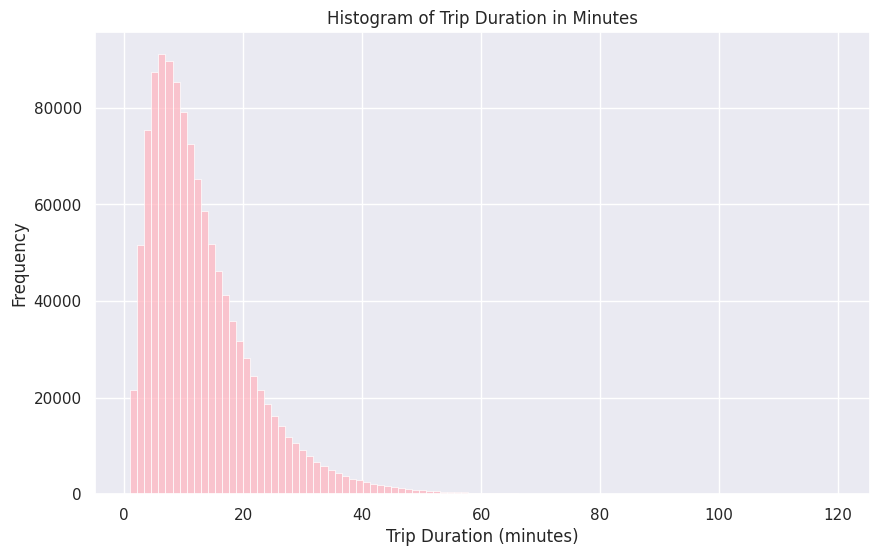

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_duration_minutes'], bins=100, color='lightpink', kde=False)
plt.title('Histogram of Trip Duration in Minutes')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [80]:
from scipy.stats import spearmanr

# Calculate Spearman's correlation
spearman_corr, spearman_p_value = spearmanr(df['trip_distance'], df['trip_duration_minutes'])

print(f"Spearman's correlation coefficient: {spearman_corr}")
print(f"p-value: {spearman_p_value}")

Spearman's correlation coefficient: 0.8147439771362651
p-value: 0.0


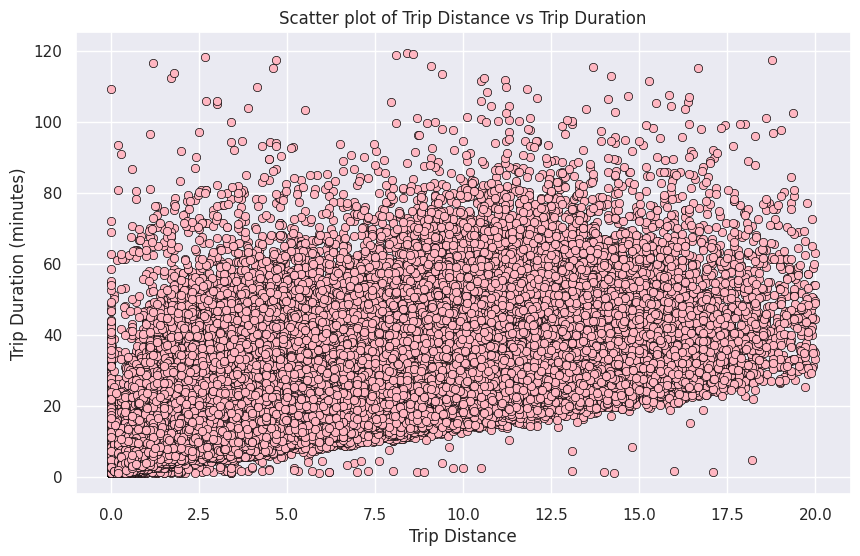

In [81]:
# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='trip_duration_minutes', data=df, color='lightpink', edgecolor='black')
plt.title('Scatter plot of Trip Distance vs Trip Duration')
plt.xlabel('Trip Distance')
plt.ylabel('Trip Duration (minutes)')
plt.grid(True)
plt.show()

In [82]:
# Group by pickup and dropoff neighborhoods
trip_duration_by_route = df.groupby(
    ['pickup_neighborhood', 'dropoff_neighborhood']
)['trip_duration_minutes'].mean().reset_index()

trip_duration_by_route = trip_duration_by_route.sort_values(by='trip_duration_minutes', ascending=False)

# Add pickup date and time columns to trip_duration_by_route
trip_duration_by_route['pickup_date'] = df['pickup_date']
trip_duration_by_route['pickup_time'] = df['pickup_time']

trip_duration_by_route

,pickup_neighborhood,dropoff_neighborhood,trip_duration_minutes,pickup_date,pickup_time
12,Borough Park,Jamaica,78.783333,2015-01-31,19:43:07
11,Borough Park,High Bridge and Morrisania,69.866667,2015-01-16,19:06:16
244,East Harlem,Southwest Brooklyn,65.233333,2015-01-03,18:30:00
309,Gramercy Park and Murray Hill,Mid-Island,65.016667,2015-01-28,17:32:22
753,Southwest Brooklyn,Chelsea and Clinton,63.366667,2015-01-24,16:45:40
68,Canarsie and Flatlands,Bushwick and Williamsburg,62.666667,2015-01-03,17:34:22
129,Central Harlem,Canarsie and Flatlands,59.500000,2015-01-18,20:55:35
316,Gramercy Park and Murray Hill,Rockaways,55.570833,2015-01-30,12:55:39
23,Borough Park,West Queens,53.891667,2015-01-18,16:17:48
202,Chelsea and Clinton,Rockaways,53.066667,2015-01-10,12:37:55


In [83]:
same_town_trip = trip_duration_by_route[trip_duration_by_route['pickup_neighborhood'] == trip_duration_by_route['dropoff_neighborhood']]

# Sort by trip duration in descending order
same_town_trip = same_town_trip.sort_values(by='trip_duration_minutes', ascending=False)
same_town_trip

,pickup_neighborhood,dropoff_neighborhood,trip_duration_minutes,pickup_date,pickup_time
704,Rockaways,Rockaways,28.016667,2015-01-13,15:54:49
69,Canarsie and Flatlands,Canarsie and Flatlands,14.966667,2015-01-21,00:49:34
162,Central Queens,Central Queens,12.229630,2015-01-15,13:51:00
626,Northeast Queens,Northeast Queens,11.643333,2015-01-23,16:33:19
255,East New York and New Lots,East New York and New Lots,11.528125,2015-01-27,21:08:52
726,Southeast Queens,Southeast Queens,10.840972,2015-01-31,10:19:34
954,West Queens,West Queens,9.816810,2015-01-04,19:02:57
488,Jamaica,Jamaica,9.355000,2015-01-28,18:05:08
0,Borough Park,Borough Park,9.268910,2015-01-06,11:39:29
24,Bronx Park and Fordham,Bronx Park and Fordham,9.084259,2015-01-17,22:46:20


### b. Number of trips

In [84]:
# Combine pickup_date and pickup_time to create a new datetime column
df['pickup_datetime'] = pd.to_datetime(df['pickup_date'].astype(str) + ' ' + df['pickup_time'].astype(str))

# Extract only the hour component from pickup_time and create rounded_hour column
df['rounded_hour'] = df['pickup_time'].apply(lambda x: x.hour)

<ipython-input-84-3f8a6fecacda>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-84-3f8a6fecacda>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Number of trips pick up by rounded hour throughout the year

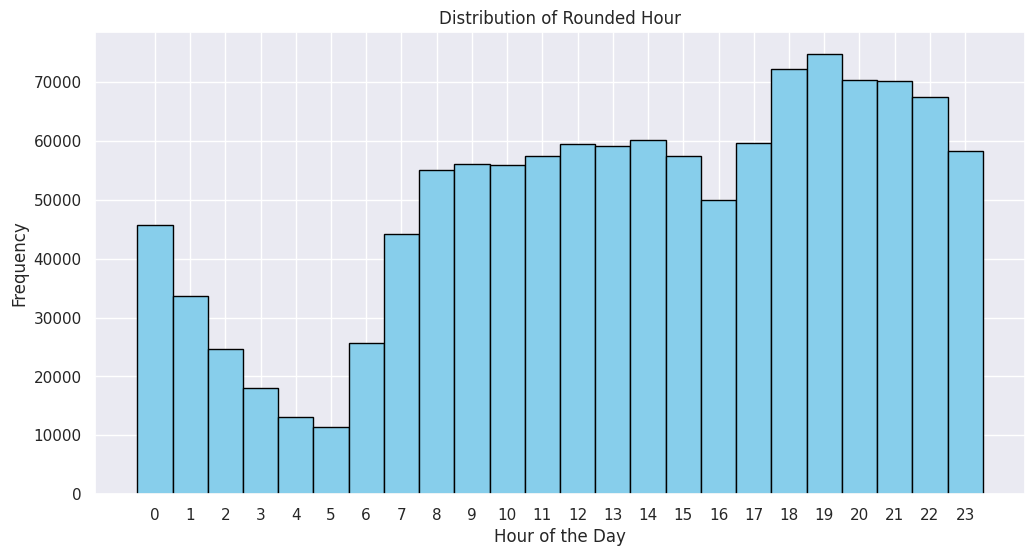

In [85]:
# Create bins from -0.5 to 23.5 (to center the bars on each hour)
bins = np.arange(-0.5, 24.5, 1)

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create histogram with explicitly defined bins
plt.hist(df['rounded_hour'], bins=bins, color='skyblue', edgecolor='black')

# Set x-ticks to display all values from 0 to 23
plt.xticks(range(24))

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Rounded Hour')

# Display the histogram
plt.show()

**Trips by hours per neighboorhood**

In [86]:
# Group by 'pickup_neighborhood' and sort each group by 'trip_count' from high to low
trips_per_hour_neighborhood = df.groupby(['pickup_neighborhood', 'rounded_hour']).size().reset_index(name='trip_count')
trips_per_hour_neighborhood_sorted = (trips_per_hour_neighborhood
                                      .groupby('pickup_neighborhood')
                                      .apply(lambda x: x.sort_values(by='trip_count', ascending=False))
                                      .reset_index(drop=True))

# Display the resulting DataFrame
print(trips_per_hour_neighborhood_sorted)

               pickup_neighborhood  rounded_hour  trip_count
0                     Borough Park             8          16
1                     Borough Park             6          15
2                     Borough Park             2          14
3                     Borough Park             4          12
4                     Borough Park             7          11
5                     Borough Park            23          10
6                     Borough Park            15           9
7                     Borough Park            17           8
8                     Borough Park             0           8
9                     Borough Park            11           7
10                    Borough Park             5           7
11                    Borough Park            16           7
12                    Borough Park            18           7
13                    Borough Park            22           7
14                    Borough Park             9           6
15                    Bo

<ipython-input-86-8116cb740d74>:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



**Showing graphs for the most taxi used neighboorhood**

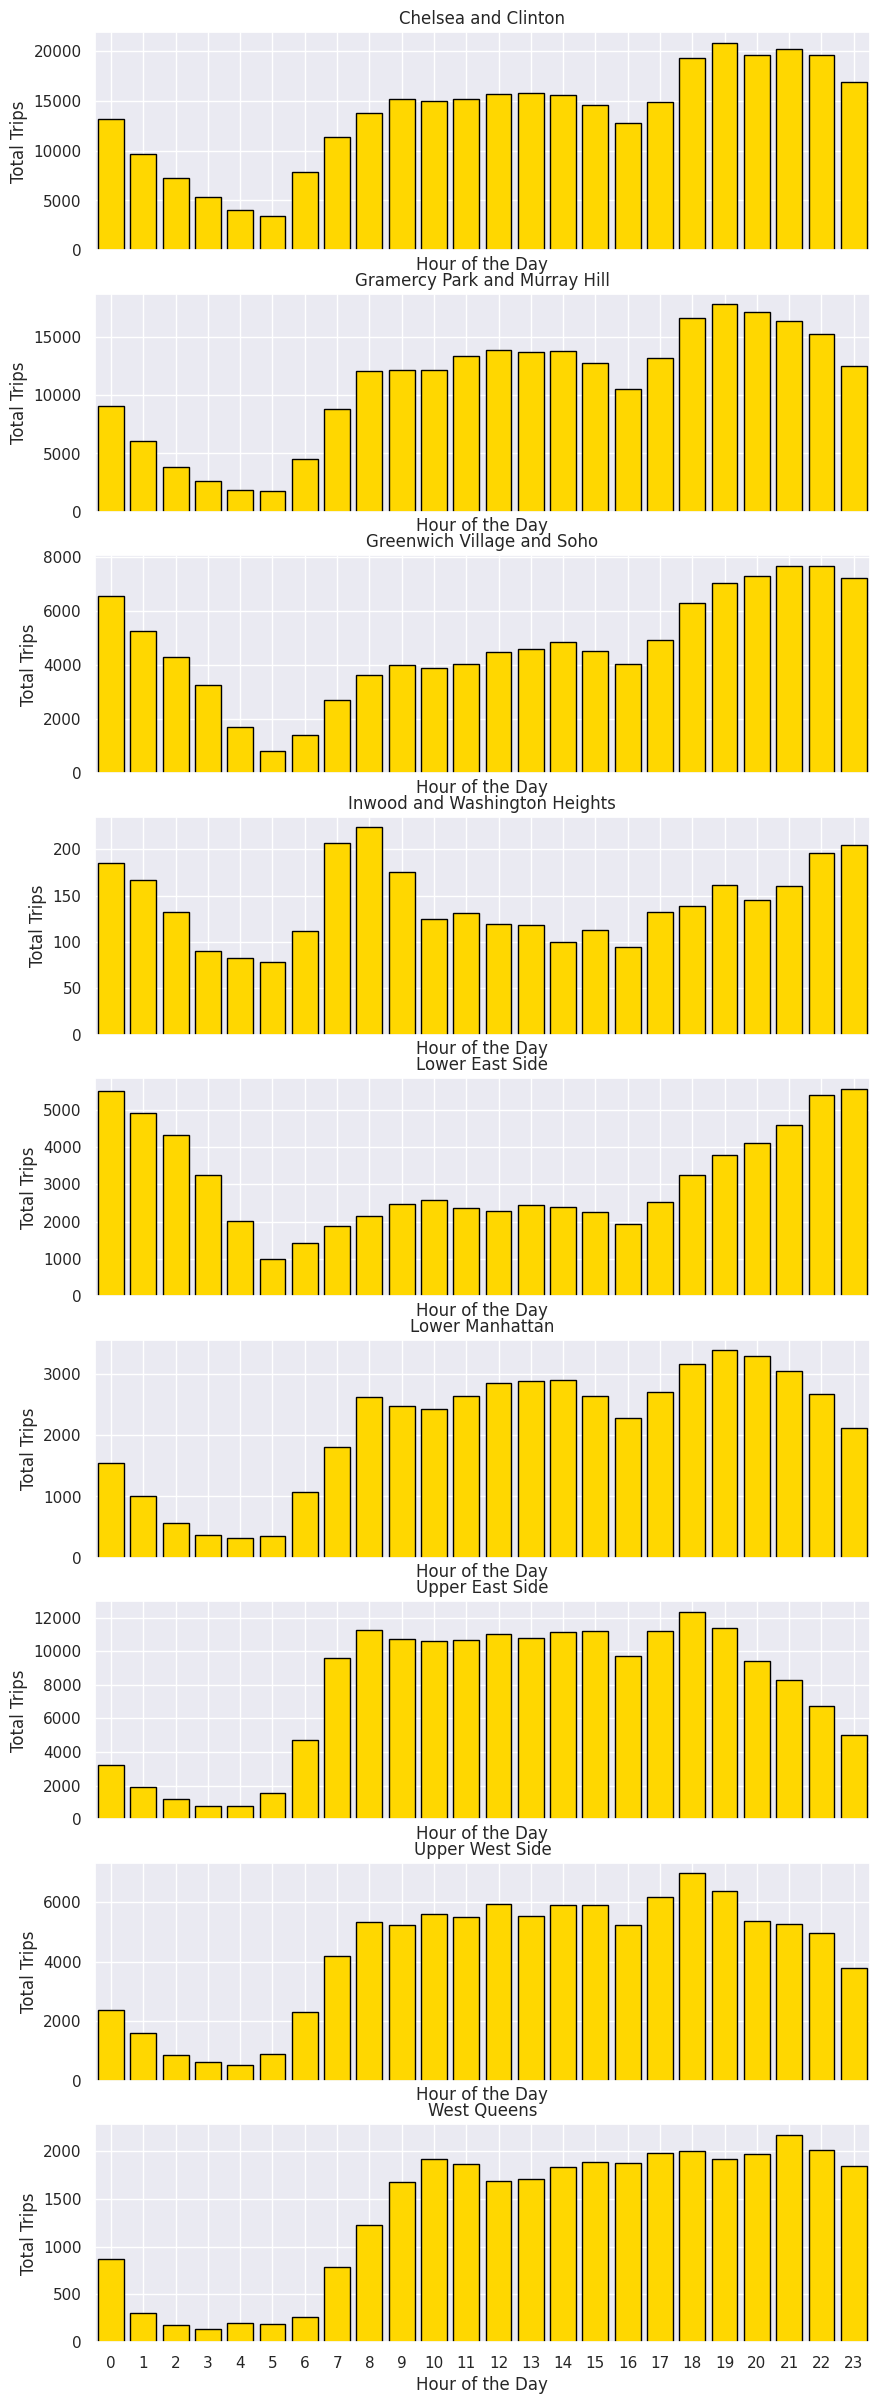

In [87]:
import matplotlib.pyplot as plt

# List of neighborhoods to plot
neighborhoods = ['Chelsea and Clinton', 'Gramercy Park and Murray Hill',
                 'Greenwich Village and Soho', 'Inwood and Washington Heights',
                 'Lower East Side', 'Lower Manhattan', 'Upper East Side',
                 'Upper West Side', 'West Queens']

# Set up subplots
fig, axs = plt.subplots(nrows=len(neighborhoods), ncols=1, figsize=(10, 30), sharex=True)

# Iterate over neighborhoods and plot
for i, neighborhood in enumerate(neighborhoods):
    # Filter data for the current neighborhood
    data = trips_per_hour_neighborhood_sorted[trips_per_hour_neighborhood_sorted['pickup_neighborhood'] == neighborhood]

    # Plot data with golden yellow color
    axs[i].bar(data['rounded_hour'], data['trip_count'], color='#FFD700', edgecolor='black')  # Golden yellow color

    # Add title and labels
    axs[i].set_title(neighborhood)
    axs[i].set_ylabel('Total Trips')
    axs[i].set_xlabel('Hour of the Day')
    axs[i].set_xticks(range(24))

    # Set x-axis limits to display values from 0 to 23
    axs[i].set_xlim(-0.5, 23.5)

# Show plots
plt.show()


**Total trip by days**

In [88]:
trips_per_day = df.groupby('pickup_date').size().reset_index(name='trip_count')

In [89]:
trips_per_day['pickup_date'] = pd.to_datetime(trips_per_day['pickup_date'])

# Define a list of day names starting from Wednesday
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate the day of the week for each pickup date
trips_per_day['Day_week'] = trips_per_day['pickup_date'].dt.dayofweek

# Map the day names to the day of the week, adjusting for Wednesday as the first day
trips_per_day['Day_week'] = trips_per_day['Day_week'].map(lambda x: day_names[x])

trips_per_day.head()

,pickup_date,trip_count,Day_week
0,2015-01-01,2888,Thursday
1,2015-01-02,2698,Friday
2,2015-01-03,3241,Saturday
3,2015-01-04,2532,Sunday
4,2015-01-05,2773,Monday


In [90]:
# Group by Day_week and calculate the average trip_count, rounding to two decimals
trips_by_day_week_avg = trips_per_day.groupby('Day_week')['trip_count'].mean().reset_index()
trips_by_day_week_avg['trip_count'] = trips_by_day_week_avg['trip_count'].round(2)

trips_by_day_week_avg

,Day_week,trip_count
0,Friday,3475.420000
1,Monday,2942.750000
2,Saturday,3570.830000
3,Sunday,3087.250000
4,Thursday,3386.170000
5,Tuesday,3184.330000
6,Wednesday,3357.270000


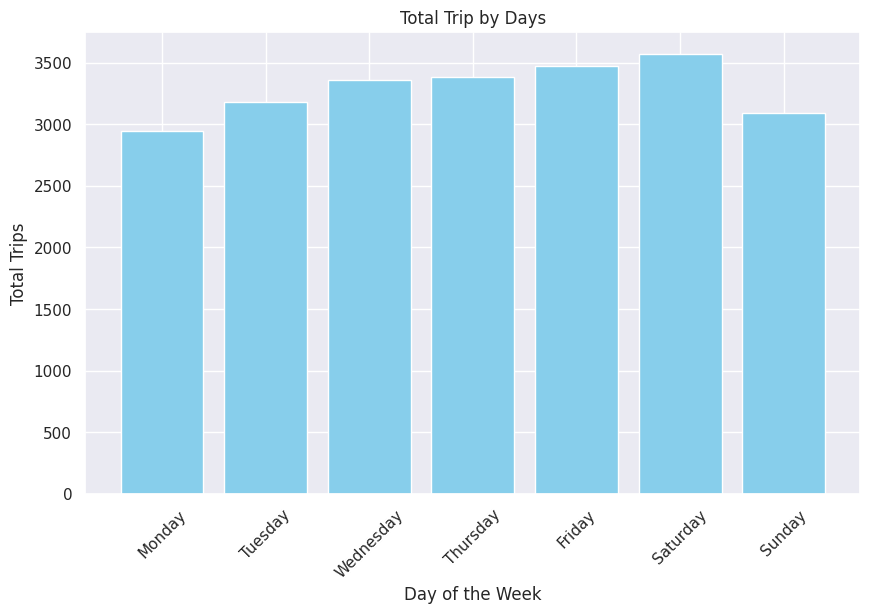

In [92]:
days_order = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7
}

# Sort the dataframe by the order of days of the week
trips_by_day_week_avg['order'] = trips_by_day_week_avg['Day_week'].map(days_order)
trips_by_day_week_avg = trips_by_day_week_avg.sort_values('order')

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(trips_by_day_week_avg['Day_week'], trips_by_day_week_avg['trip_count'], color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Trips')
plt.title('Total Trip by Days')
plt.xticks(rotation=45)
plt.show()

**By holidays**

In [93]:
holiday

,Date,Holiday
0,01.01.15,New Years Day
1,19.01.15,Martin Luther King Jr. Day
2,12.02.15,Lincoln's Birthday
3,16.02.15,Presidents' Day
4,10.05.15,Mother's Day
5,25.05.15,Memorial Day
6,21.06.15,Father's Day
7,03.07.15,Independence Day (observed)
8,07.09.15,Labor Day
9,12.10.15,Columbus Day


In [94]:
trips_per_day['pickup_date'] = pd.to_datetime(trips_per_day['pickup_date'])
holiday['Date'] = pd.to_datetime(holiday['Date'])

holiday_count = pd.merge(trips_per_day, holiday, left_on='pickup_date', right_on='Date', how='left')
holiday_trip_count = holiday_count.groupby(['Holiday', 'Date', 'Day_week']).agg({'trip_count': 'sum'}).reset_index()
holiday_trip_count = holiday_trip_count.rename(columns={'trip_count': 'Total Count'})

# Sort the DataFrame based on the date
holiday_trip_count = holiday_trip_count.sort_values(by='Date')

print(holiday_trip_count)

                        Holiday       Date   Day_week  Total Count
10                New Years Day 2015-01-01   Thursday         2888
7    Martin Luther King Jr. Day 2015-01-19     Monday         2815
11              Presidents' Day 2015-02-16     Monday         3163
4   Independence Day (observed) 2015-03-07   Saturday         3844
8                  Memorial Day 2015-05-25     Monday         2232
3                  Father's Day 2015-06-21     Sunday         2960
5                     Labor Day 2015-07-09   Thursday         3520
9                  Mother's Day 2015-10-05     Monday         2736
13                 Veterans Day 2015-11-11  Wednesday         3268
12                 Thanksgiving 2015-11-26   Thursday         2172
2        Day after Thanksgiving 2015-11-27     Friday         2482
6            Lincoln's Birthday 2015-12-02  Wednesday         3254
1                  Columbus Day 2015-12-10   Thursday         3524
0                 Christmas Day 2015-12-25     Friday         

<ipython-input-94-dbc434fe7e7c>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

